In [1]:
import numpy as np
import pandas as pd


In [2]:
#- ***ticket_data.csv*** : Contenant un historique de ticket 
# (une ligne => une proposition de ticket sur tictactrip)
#- ***cities.csv*** les villes desservies par tictactrip 
# (lien grâce aux colonnes o_city (origin_city), d_city (destination_city) de ticket_data)
#- ***stations.csv*** les stations desservies par tictactrip 
# (lien via o_station, d_station de ticket_data)
#- ***providers.csv*** infos sur les différents providers 
# (lien via company de ticket_data)Un provider est une "sous-compagnie". 
# Par exemple TGV et TER sont deux providers de VSC (voyages-sncf).

### Read Data

In [3]:
cities = pd.read_csv("data/cities.csv")
providers = pd.read_csv("data/providers.csv")
stations = pd.read_csv("data/stations.csv")
ticket_data = pd.read_csv("data/ticket_data.csv")

- ***ticket_data.csv*** : Contenant un historique de ticket (une ligne => une proposition de ticket sur tictactrip)
- ***cities.csv*** les villes desservies par tictactrip (lien grâce aux colonnes o_city (origin_city), d_city (destination_city) de ticket_data)
- ***stations.csv*** les stations desservies par tictactrip (lien via o_station, d_station de ticket_data)
- ***providers.csv*** infos sur les différents providers (lien via company de ticket_data)Un provider est une "sous-compagnie". Par exemple TGV et TER sont deux providers de VSC (voyages-sncf).


### View the properties of all files

In [4]:
cities.head()

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [5]:
providers.head()

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


In [6]:
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [7]:
stations.head()

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


## Objectifs

- Extraire des infos intéressantes type :
    - prix min, moyen et max
    - durée min, max, moyenne par trajet
- Différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet
    
    Par exemple (0-200km, 201-800km, 800-2000km, 2000+km)
    
- Le plus d’infos bonus !
    
    Comme par exemple :
    
    *Graphes, prédictions de prix, rapport des soucis relevés dans les données, visualisation interactive, sourcing & utilisation de données externes pertinentes, utilisation d’API externes*

## Principaux objectifs pour Dataframe:  
- **Distance**  
Calculate the distance between the destination city and the origin city 
- **Duree**  
Calculate the duration of the tarjet  
- **Transport_types**  
List all modes of transportation


- Transfer_id (station or city) to Coordinates  
id: int -> coordinate(latitude, longtitude)  
- Calculate the distance based on coordinate  
List[coordinate] -> distance: int  
- transfer company to transport_type by using provider.csv

- **For ticket_data**: 
 calculate_distance: check middle stations, calculate the distance of each coordinate, sum
 calculate_time,
 calculate_

 result_dataframe:
 distance, transport_type, price, time, 

 Perpare to prediction:
 Train_Dataframe : 

In [8]:
def station_coordinate(station_id):
    if pd.isna(station_id):
        return station_id
    else:
        station_id = int(station_id)
        latitude = float(stations[stations["id"] == station_id]["latitude"])
        longitude = float(stations[stations["id"] == station_id]["longitude"])
        return (latitude,longitude)
    

In [9]:
def city_coordinate(city_id):
    city_id = int(city_id)
    latitude = float(cities[cities["id"] == city_id]["latitude"])
    longitude = float(cities[cities["id"] == city_id]["longitude"])
    return (latitude,longitude)

In [10]:
def company_to_transport(company_id):
    company_id = int(company_id)
    transport_type = providers[providers["id"] == company_id]["transport_type"]
    return transport_type.iloc[0]

In [11]:
def companies_to_transport(companies_id):
    transport_types = set()
    for ids in companies_id:
        transport_type = providers[providers["id"] == ids]["transport_type"]
        transport_types = set(transport_type).union(transport_types)
    return transport_types

 Because there are airport in stations.csv, so I consider whether should add airplane in transport_type.

In [12]:
# def if_airplane(station):
#     if pd.isna(station):
#         pass
#     else:
#         return set(['airplane'])

In [13]:
#if_airplane(ticket_data["o_station"][0])

In [14]:
from geopy.distance import distance

def calculate_distance(coor1, coor2):
    dist = distance(coor1,coor2).km
    return dist

In [15]:
from datetime import datetime

def calculate_time(row):
    
    date_format = '%Y-%m-%d %H:%M:%S+00'
    departure_time = datetime.strptime(row["departure_ts"], date_format)
    arrival_time = datetime.strptime(row["arrival_ts"], date_format)
    
    duration = arrival_time - departure_time
    return duration

In [16]:
def get_id(id_str):
    if pd.isna(id_str):
        return set()
    else:
        id_str = id_str[1:-1]
        id_int = id_str.split(",")
        id_int = {int(x) for x in id_int}
        return id_int

In [17]:
def get_type(type_list):
    type_str = ','.join(type_list)
    return type_str

In [18]:
get_id(ticket_data["middle_stations"][2])

{798, 6246, 6794}

In [19]:
company_to_transport(8389)

'carpooling'

In [20]:
print(station_coordinate(5))

(51.1236038208008, 13.7647371292114)


In [21]:
print(city_coordinate(5))

(43.316935, 3.466386)


In [22]:
calculate_distance(station_coordinate(8670), station_coordinate(3))

1183.4654010933623

In [23]:
ticket_data["duree"] = ticket_data.apply(calculate_time, axis = 1)
ticket_data["coor_o_city"] = ticket_data.apply(lambda row: city_coordinate(row["o_city"]), axis = 1)
ticket_data["coor_d_city"] = ticket_data.apply(lambda row: city_coordinate(row["d_city"]), axis = 1)
ticket_data["dis_city"] = ticket_data.apply(lambda row: calculate_distance(row["coor_o_city"],row["coor_d_city"] ), axis = 1 )

In [24]:
ticket_data["duree"] = ticket_data.apply(calculate_time, axis = 1)
ticket_data["coor_o_station"] = ticket_data.apply(lambda row: station_coordinate(row["o_station"]), axis = 1)
ticket_data["coor_d_station"] = ticket_data.apply(lambda row: station_coordinate(row["d_station"]), axis = 1)
ticket_data["dis_city"] = ticket_data.apply(lambda row: calculate_distance(row["coor_o_city"],row["coor_d_city"] ), axis = 1 )

In [25]:
ticket_data["transport_type"] = ticket_data.apply(lambda row: company_to_transport(row["company"]), axis = 1)
ticket_data["middle_stations"] = ticket_data.apply(lambda row : get_id(row["middle_stations"]), axis = 1)
ticket_data["other_companies"] = ticket_data.apply(lambda row : get_id(row["other_companies"]), axis = 1)


In [26]:
ticket_data["all_companies"] = ticket_data.apply(lambda row : row["other_companies"].union(set([row["company"]])), axis = 1)
ticket_data["all_transport_types"] = ticket_data.apply(lambda row: companies_to_transport(row["all_companies"]), axis = 1)

In [27]:
# ticket_data["all_transport_types"] = \
# ticket_data.apply(lambda row: row["all_transport_type"].union(set(if_airplane(row["o_station"]))) \
#                   if pd.notna(row["o_station"]) \
#                   else row["all_transport_type"], axis = 1)

The most basic requirement:   
get the mode of transport used for each formation : "all_transport_types"  
get the coordinate of cities and stations : "coor_o_city", "coor_d_city", "coor_o_station", "coor_d_station"  
get the distance of each trajet : "dis_city"  
get the time required for each trip : "duree"
    

In [28]:
ticket_data.head(20)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,d_city,duree,coor_o_city,coor_d_city,dis_city,coor_o_station,coor_d_station,transport_type,all_companies,all_transport_types
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,{},{},...,542,0 days 06:10:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,NaN,NaN,carpooling,{8385},{carpooling}
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},...,542,0 days 17:50:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.896911, 1.854277)","(43.583932, 3.860233)",bus,"{9, 13}",{bus}
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",...,542,1 days 07:57:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.92674, 1.90674)","(43.6049, 3.8805)",train,"{8376, 8377}",{train}
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",...,542,0 days 21:35:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.92674, 1.90674)","(43.6049, 3.8805)",train,"{8376, 8377}",{train}
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},...,542,0 days 21:46:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.92674, 1.90674)","(43.6049, 3.8805)",train,"{8380, 8381}",{train}
5,6795030,8385,NaN,NaN,2017-10-06 05:30:00+00,2017-10-06 08:30:00+00,1800,2017-10-01 01:03:18.948+00,{},{},...,453,0 days 03:00:00,"(48.8477019, 2.3523109)","(50.638756, 3.076675)",205.933671,NaN,NaN,carpooling,{8385},{carpooling}
6,6795031,8385,NaN,NaN,2017-10-06 07:00:42+00,2017-10-06 09:30:42+00,2150,2017-10-01 01:03:18.948+00,{},{},...,453,0 days 02:30:00,"(48.8477019, 2.3523109)","(50.638756, 3.076675)",205.933671,NaN,NaN,carpooling,{8385},{carpooling}
7,6795032,8385,NaN,NaN,2017-10-06 07:10:00+00,2017-10-06 09:40:00+00,1700,2017-10-01 01:03:18.948+00,{},{},...,453,0 days 02:30:00,"(48.8477019, 2.3523109)","(50.638756, 3.076675)",205.933671,NaN,NaN,carpooling,{8385},{carpooling}
8,6795033,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,1700,2017-10-01 01:03:18.948+00,{},{},...,453,0 days 02:50:00,"(48.8477019, 2.3523109)","(50.638756, 3.076675)",205.933671,NaN,NaN,carpooling,{8385},{carpooling}
9,6795034,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,1900,2017-10-01 01:03:18.948+00,{},{},...,453,0 days 02:50:00,"(48.8477019, 2.3523109)","(50.638756, 3.076675)",205.933671,NaN,NaN,carpooling,{8385},{carpooling}


# Visualisation

### Get a dataframe named df for data visualization

In [29]:
df = ticket_data.loc[:,['id', 'price_in_cents', 'duree', 'dis_city','transport_type','all_transport_types']].copy()
df.head(70)

,id,price_in_cents,duree,dis_city,transport_type,all_transport_types
0,6795025,4550,0 days 06:10:00,503.136831,carpooling,{carpooling}
1,6795026,1450,0 days 17:50:00,503.136831,bus,{bus}
2,6795027,7400,1 days 07:57:00,503.136831,train,{train}
3,6795028,13500,0 days 21:35:00,503.136831,train,{train}
4,6795029,7710,0 days 21:46:00,503.136831,train,{train}
...,...,...,...,...,...,...
65,6795089,3220,0 days 02:56:00,205.933671,train,{train}
66,6795090,4300,0 days 02:32:00,205.933671,train,{train}
67,6795091,5250,0 days 02:06:00,205.933671,train,{train}
68,6795092,4500,0 days 02:58:00,205.933671,train,{train}


In [30]:
def time_to_hours(time_obj):
    time_delta = datetime.timedelta(days=time_obj.days, hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)
    hours = time_delta.total_seconds() / 3600
    return hours

In [31]:
df["duree"] = df.apply(lambda row : row["duree"].total_seconds() / 3600.0, axis = 1)

In [32]:
df['all_transport_types'] = df['all_transport_types'].apply(list)
df['all_transport_types'] = df.apply(lambda row: get_type(row['all_transport_types']), axis = 1)

Grouping each trip for data visualisation

In [33]:
bins = [0,201,801,2000]
labels = ['0-200','201-800','801-2000']
dis_group = pd.cut(df['dis_city'], bins = bins, labels = labels, right = False )

df["dis_group"] = dis_group

## Complete and uniform data format and grouping

In [34]:
df.head(100)

,id,price_in_cents,duree,dis_city,transport_type,all_transport_types,dis_group
0,6795025,4550,6.166667,503.136831,carpooling,carpooling,201-800
1,6795026,1450,17.833333,503.136831,bus,bus,201-800
2,6795027,7400,31.950000,503.136831,train,train,201-800
3,6795028,13500,21.583333,503.136831,train,train,201-800
4,6795029,7710,21.766667,503.136831,train,train,201-800
...,...,...,...,...,...,...,...
95,6795119,1900,2.833333,233.247127,carpooling,carpooling,201-800
96,6795120,1900,2.666667,233.247127,carpooling,carpooling,201-800
97,6795121,5490,22.250000,233.247127,bus,bus,201-800
98,6795122,6490,12.000000,233.247127,bus,bus,201-800


In [35]:
df['all_transport_types'] = df['all_transport_types'].apply(str)
df1 = df.groupby(['dis_group','all_transport_types'])['price_in_cents'].mean()
df1 = df1.reset_index()

In [36]:
df1

,dis_group,all_transport_types,price_in_cents
0,0-200,bus,2098.375806
1,0-200,"bus,train",3190.416667
2,0-200,carpooling,1194.539117
3,0-200,train,3493.397858
4,201-800,bus,3460.467488
5,201-800,"bus,train",7829.679144
6,201-800,carpooling,3231.112367
7,201-800,train,9141.916086
8,801-2000,bus,6949.950045
9,801-2000,"bus,train",NaN


In [37]:
df2 = df.groupby(['dis_group','all_transport_types'])['price_in_cents'].max()
df2 = df2.reset_index()

In [38]:
df3 = df.groupby(['dis_group','all_transport_types'])['price_in_cents'].min()
df3 = df3.reset_index()

### Chart on trip prices, grouped by trip distance and mode of transportation

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
def draw_pricebar(dataframe):
    sns.set_theme(style="whitegrid")
    g = sns.catplot(
        data=dataframe, kind="bar",
        x="dis_group", y="price_in_cents", hue="all_transport_types",
        palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", "Price by Distance Group and Transport Type")
    g.legend.set_title("")




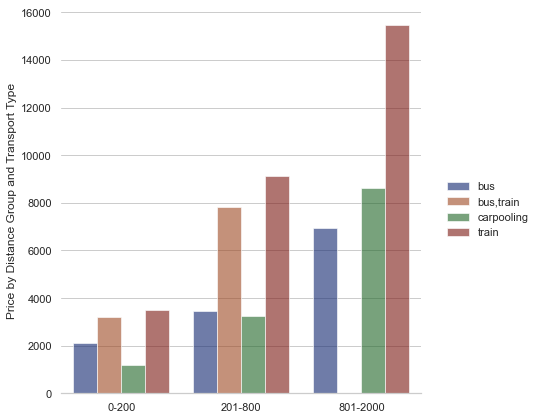

In [40]:
draw_pricebar(df1)

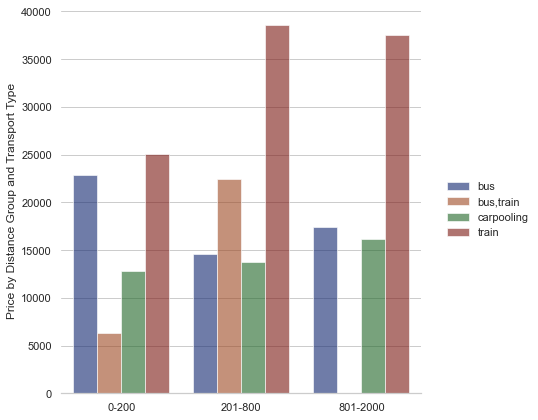

In [41]:
draw_pricebar(df2)

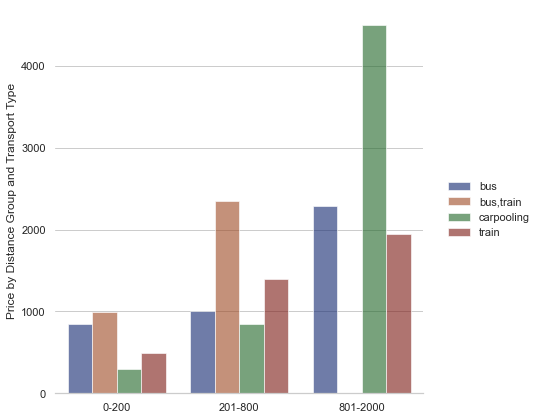

In [42]:
draw_pricebar(df3)

### Chart on trip time, grouped by trip distance and mode of transportation

In [43]:
def draw_timebar(dataframe):
    sns.set_theme(style="whitegrid")
    g = sns.catplot(
        data=dataframe, kind="bar",
        x="dis_group", y="duree", hue="all_transport_types",
        palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", "Duree by Distance Group and Transport Type")
    g.legend.set_title("")

In [44]:
df4 = df.groupby(['dis_group','all_transport_types'])['duree'].mean()
df4 = df4.reset_index()

In [45]:
df5 = df.groupby(['dis_group','all_transport_types'])['duree'].max()
df5 = df5.reset_index()

In [46]:
df6 = df.groupby(['dis_group','all_transport_types'])['duree'].min()
df6 = df6.reset_index()

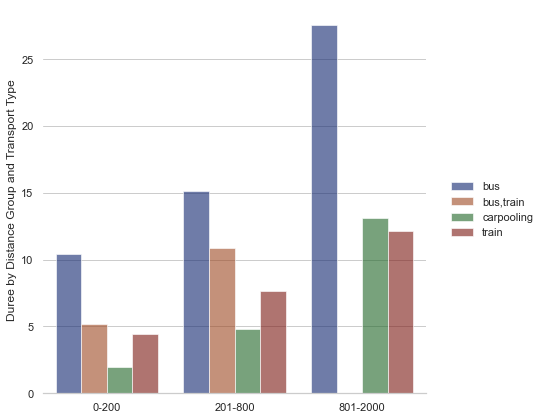

In [47]:
draw_timebar(df4)

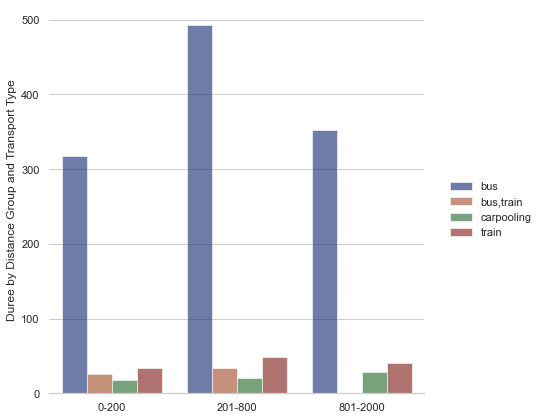

In [48]:
draw_timebar(df5)

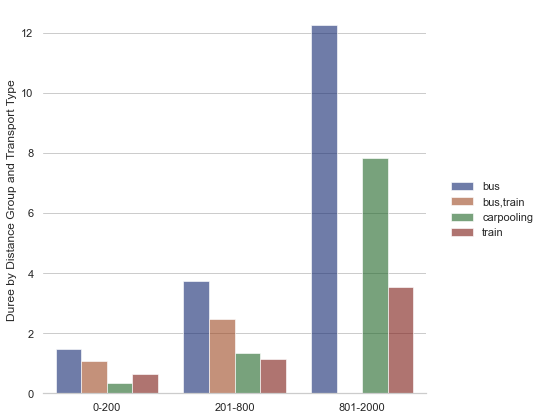

In [49]:
draw_timebar(df6)

In [50]:
df

,id,price_in_cents,duree,dis_city,transport_type,all_transport_types,dis_group
0,6795025,4550,6.166667,503.136831,carpooling,carpooling,201-800
1,6795026,1450,17.833333,503.136831,bus,bus,201-800
2,6795027,7400,31.950000,503.136831,train,train,201-800
3,6795028,13500,21.583333,503.136831,train,train,201-800
4,6795029,7710,21.766667,503.136831,train,train,201-800
...,...,...,...,...,...,...,...
74163,6869182,2590,13.500000,339.046766,bus,bus,201-800
74164,6869185,2700,6.500000,339.046766,bus,bus,201-800
74165,6869187,3000,6.750000,339.046766,bus,bus,201-800
74166,6869189,2880,7.750000,339.046766,bus,bus,201-800


## Prepare dataframe for predicting prices

In [51]:
df_encoded = pd.get_dummies(df["all_transport_types"])

In [52]:
df_encoded = pd.concat([df, df_encoded], axis = 1)


In [53]:
df_encoded

,id,price_in_cents,duree,dis_city,transport_type,all_transport_types,dis_group,bus,"bus,train",carpooling,train
0,6795025,4550,6.166667,503.136831,carpooling,carpooling,201-800,0,0,1,0
1,6795026,1450,17.833333,503.136831,bus,bus,201-800,1,0,0,0
2,6795027,7400,31.950000,503.136831,train,train,201-800,0,0,0,1
3,6795028,13500,21.583333,503.136831,train,train,201-800,0,0,0,1
4,6795029,7710,21.766667,503.136831,train,train,201-800,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,2590,13.500000,339.046766,bus,bus,201-800,1,0,0,0
74164,6869185,2700,6.500000,339.046766,bus,bus,201-800,1,0,0,0
74165,6869187,3000,6.750000,339.046766,bus,bus,201-800,1,0,0,0
74166,6869189,2880,7.750000,339.046766,bus,bus,201-800,1,0,0,0


In [55]:
train_data = df_encoded.loc[:,['price_in_cents', 'duree', 'dis_city', 'bus', 'carpooling', 'train', 'bus,train']].copy()

In [56]:
train_data

,price_in_cents,duree,dis_city,bus,carpooling,train,"bus,train"
0,4550,6.166667,503.136831,0,1,0,0
1,1450,17.833333,503.136831,1,0,0,0
2,7400,31.950000,503.136831,0,0,1,0
3,13500,21.583333,503.136831,0,0,1,0
4,7710,21.766667,503.136831,0,0,1,0
...,...,...,...,...,...,...,...
74163,2590,13.500000,339.046766,1,0,0,0
74164,2700,6.500000,339.046766,1,0,0,0
74165,3000,6.750000,339.046766,1,0,0,0
74166,2880,7.750000,339.046766,1,0,0,0


# Prédiction

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict,cross_val_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler

In [58]:
y = np.array(train_data['price_in_cents'])
X = np.array(train_data.drop('price_in_cents', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
y_val = y_test.ravel()
y_train = y_train.ravel()

### Perform data normalization with the expectation that convergence will be obtained during training

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_val = scaler.transform(X_test)

In [61]:
logytrain = train_data['price_in_cents']
logytrain

0         4550
1         1450
2         7400
3        13500
4         7710
         ...  
74163     2590
74164     2700
74165     3000
74166     2880
74167     2000
Name: price_in_cents, Length: 74168, dtype: int64

In [62]:
logxtrain = train_data.sample(frac=0.7, random_state=10)
logxtest  = train_data.drop(logxtrain.index)

In [63]:
Logy = train_data.drop(logxtest.index)
logytrain = Logy['price_in_cents']
Logyt = train_data.drop(logxtrain.index)
logytest = Logyt['price_in_cents']
logytest

2         7400
3        13500
4         7710
10        1550
19        2300
         ...  
74136     2650
74140     2900
74147     8450
74158     2400
74163     2590
Name: price_in_cents, Length: 22250, dtype: int64

In [ ]:
from sklearn.svm import LinearSVR, SVR

model_SVM = SVR(kernel='linear',C=0.7,epsilon=0.2)

#kf = KFold(n_splits=5, shuffle=True)

#scores = cross_val_score(model_SVM, X, y, cv=kf, scoring='r2')
print("SVR R2 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model_SVM.fit(x_train, y_train)

y_pred = model_SVM.predict(x_val)



- There are multiple methods that can verify the accuracy of the model that cannot be implemented due to computer performance.  
For example, K-fold, cross-validation, etc.

In [65]:
std_list = [np.std([x, y]) for x, y in zip(y_pred, y_val)]
median_distance = np.median(std_list)

In [67]:
median_distance

170.6545527749381

In [68]:
std_list

[71.61226590593287,
 47.34856226112697,
 53.144680089322264,
 536.582966262106,
 148.5117807076133,
 187.55671543009794,
 471.40803293126964,
 2511.531653041422,
 538.8232614907363,
 346.7410415836832,
 3998.3408973889636,
 1814.951643416768,
 0.8839522266500808,
 779.2844962725189,
 626.29852672795,
 48.99218111094865,
 321.6538207634235,
 129.23360143435843,
 187.83495196953663,
 53.144680089322264,
 8.778364083460474,
 177.96162447540155,
 457.6893890373649,
 1468.8044922267227,
 110.33449189080214,
 293.4455283903394,
 331.5762212578038,
 65.76285400600227,
 162.30182787802642,
 1702.384720982664,
 309.0004306090723,
 434.1449870492934,
 53.69384693123379,
 282.77846473106456,
 579.158434795384,
 174.72642959129234,
 43.497782246599854,
 1.2500634545360754,
 205.66011980887743,
 231.0016822532616,
 1347.8906166563766,
 620.3832486581227,
 1110.475684579716,
 30.497525758035863,
 3.5107913172726057,
 27.34978200721207,
 127.96162447540155,
 803.2538093231342,
 239.89910797941093,
 1

Prediction by logistic regression has also been tried, and this approach allows finding the best hyperparameters based on the value of accurancy.

In [72]:
# parametre = []
# accuracy = []
# for C in range(1,10,1):
#     for tol in range(1,10,1):
#         model = LogisticRegression(C=C/10, tol=tol/100,penalty = 'l2')
#         accura = cross_val_score(model,x_train,y_train,cv=5,scoring = 'accuracy').mean()
#         accuracy.append(accura)
#         parametre.append([C,tol,accura])

## Map Interaction

In [70]:
stations

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
...,...,...,...,...
11030,11032,Porto Avda De Los Aliados,41.146922,-8.611122
11031,11033,Rom Ciampino Flughafen Piazzale Leonardo da Vinci,41.804102,12.597110
11032,11034,Sants,41.379892,2.139462
11033,11035,Vozilici D66,45.157136,14.164140


In [71]:
cities

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [73]:
cities_map = cities.loc[0:100,:].copy()
stations_map = stations.loc[0:100,:].copy()

In [74]:
stations_map

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
...,...,...,...,...
96,97,Beverstedt,53.434962,8.818979
97,98,Bibinje,44.067657,15.292669
98,99,Bielefeld Brackwede train station,51.997974,8.499713
99,100,Binz (Rügen),54.405138,13.600996


In [75]:
import folium

m = folium.Map(location=[cities_map['latitude'].mean(), cities_map['longitude'].mean()], zoom_start=4)

for index, row in cities_map.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['local_name']
    ).add_to(m)

m

In [76]:
m2 = folium.Map(location=[stations_map['latitude'].mean(), stations_map['longitude'].mean()], zoom_start=4)

for index, row in stations_map.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['unique_name']
    ).add_to(m2)

m2

In [77]:
ticket_data.loc[20]

id                                       6795045
company                                     8385
o_station                                    NaN
d_station                                    NaN
departure_ts              2017-10-06 14:50:00+00
arrival_ts                2017-10-06 17:40:00+00
price_in_cents                              1700
search_ts              2017-10-01 01:03:18.95+00
middle_stations                               {}
other_companies                               {}
o_city                                       628
d_city                                       453
duree                            0 days 02:50:00
coor_o_city              (48.8477019, 2.3523109)
coor_d_city                (50.638756, 3.076675)
dis_city                              205.933671
coor_o_station                               NaN
coor_d_station                               NaN
transport_type                        carpooling
all_companies                             {8385}
all_transport_types 

In [79]:
m = folium.Map(location=[45.406435, 11.876761], zoom_start=12)

points = [(45.406435, 11.876761), (41.385064, 2.173404)]

folium.PolyLine(points, color='red').add_to(m)

m

In [83]:
cities

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [84]:
ticket_data

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,d_city,duree,coor_o_city,coor_d_city,dis_city,coor_o_station,coor_d_station,transport_type,all_companies,all_transport_types
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,{},{},...,542,0 days 06:10:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,NaN,NaN,carpooling,{8385},{carpooling}
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},...,542,0 days 17:50:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.896911, 1.854277)","(43.583932, 3.860233)",bus,"{9, 13}",{bus}
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",...,542,1 days 07:57:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.92674, 1.90674)","(43.6049, 3.8805)",train,"{8376, 8377}",{train}
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",...,542,0 days 21:35:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.92674, 1.90674)","(43.6049, 3.8805)",train,"{8376, 8377}",{train}
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},...,542,0 days 21:46:00,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.92674, 1.90674)","(43.6049, 3.8805)",train,"{8380, 8381}",{train}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,{408},{8371},...,562,0 days 13:30:00,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.046766,"(48.838424, 2.382411)","(47.212922, -1.551565)",bus,"{8371, 13}",{bus}
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,{1105},{9},...,562,0 days 06:30:00,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.046766,"(48.838424, 2.382411)","(47.248785, -1.520898)",bus,{9},{bus}
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,{1105},{9},...,562,0 days 06:45:00,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.046766,"(48.865601, 2.414588)","(47.248785, -1.520898)",bus,"{9, 8371}",{bus}
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,{863},{13},...,562,0 days 07:45:00,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.046766,"(48.838424, 2.382411)","(47.248785, -1.520898)",bus,{13},{bus}


In [85]:
def city_name(city_id):
    city_id = int(city_id)
    cityname = list(cities[cities["id"] == city_id]["unique_name"])
    return cityname[0]

In [86]:
city_name(14)

'alessandria'

In [87]:
ticket_data["name_o_city"] = ticket_data.apply(lambda row: city_name(row["o_city"]), axis = 1)
ticket_data["name_d_city"] = ticket_data.apply(lambda row: city_name(row["d_city"]), axis = 1)

In [88]:
def trajet_map(ticket_data):
    
    m = folium.Map(location=ticket_data['coor_o_city'], zoom_start=12)

    points = [ticket_data['coor_o_city'], ticket_data['coor_d_city']]

    folium.PolyLine(points, color='red').add_to(m)
    
#     popup = ticket_data['name_o_city'].concat(ticket_data['name_o_city'])
    folium.Marker(
        location=ticket_data['coor_o_city'],
        popup=ticket_data['name_o_city']
    ).add_to(m)
    
    folium.Marker(
        location=ticket_data['coor_d_city'],
        popup=ticket_data['name_d_city']
    ).add_to(m)
    
    
    print(ticket_data)
    return m

In [89]:
ticket_data

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,coor_o_city,coor_d_city,dis_city,coor_o_station,coor_d_station,transport_type,all_companies,all_transport_types,name_o_city,name_d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,{},{},...,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,NaN,NaN,carpooling,{8385},{carpooling},orleans,montpellier
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},...,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.896911, 1.854277)","(43.583932, 3.860233)",bus,"{9, 13}",{bus},orleans,montpellier
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",...,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.92674, 1.90674)","(43.6049, 3.8805)",train,"{8376, 8377}",{train},orleans,montpellier
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",...,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.92674, 1.90674)","(43.6049, 3.8805)",train,"{8376, 8377}",{train},orleans,montpellier
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},...,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.136831,"(47.92674, 1.90674)","(43.6049, 3.8805)",train,"{8380, 8381}",{train},orleans,montpellier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,{408},{8371},...,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.046766,"(48.838424, 2.382411)","(47.212922, -1.551565)",bus,"{8371, 13}",{bus},paris,nantes
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,{1105},{9},...,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.046766,"(48.838424, 2.382411)","(47.248785, -1.520898)",bus,{9},{bus},paris,nantes
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,{1105},{9},...,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.046766,"(48.865601, 2.414588)","(47.248785, -1.520898)",bus,"{9, 8371}",{bus},paris,nantes
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,{863},{13},...,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",339.046766,"(48.838424, 2.382411)","(47.248785, -1.520898)",bus,{13},{bus},paris,nantes


In [90]:
trajet_map(ticket_data.loc[30000,:])

id                                        6825025
company                                      8385
o_station                                     NaN
d_station                                     NaN
departure_ts               2017-10-10 13:30:00+00
arrival_ts                 2017-10-10 18:40:00+00
price_in_cents                               4300
search_ts              2017-10-08 18:23:23.542+00
middle_stations                                {}
other_companies                                {}
o_city                                        200
d_city                                        504
duree                             0 days 05:10:00
coor_o_city                    (45.77078, 3.0823)
coor_d_city                  (43.296482, 5.36978)
dis_city                                329.59558
coor_o_station                                NaN
coor_d_station                                NaN
transport_type                         carpooling
all_companies                              {8385}


In [91]:
trajet_map(ticket_data.loc[20])

id                                       6795045
company                                     8385
o_station                                    NaN
d_station                                    NaN
departure_ts              2017-10-06 14:50:00+00
arrival_ts                2017-10-06 17:40:00+00
price_in_cents                              1700
search_ts              2017-10-01 01:03:18.95+00
middle_stations                               {}
other_companies                               {}
o_city                                       628
d_city                                       453
duree                            0 days 02:50:00
coor_o_city              (48.8477019, 2.3523109)
coor_d_city                (50.638756, 3.076675)
dis_city                              205.933671
coor_o_station                               NaN
coor_d_station                               NaN
transport_type                        carpooling
all_companies                             {8385}
all_transport_types 